In [1]:
from shapely import Point, LineString, Polygon

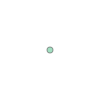

In [2]:
point = Point(1, 2)
point

In [3]:
print(point)

POINT (1 2)


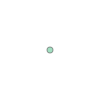

In [4]:
point_3d = Point(2, 4, 1)
point_3d

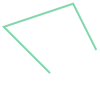

In [5]:
point_1 = Point(0, 0)
point_2 = Point(-1, 1)
point_3 = Point(0.5, 1.5)
point_4 = Point(1, 0.5)

list_of_points = [point_1, point_2, point_3, point_4]

line = LineString(list_of_points)
line

In [6]:
print(line.length)
print(line.centroid)

4.11338638120718
POINT (-0.0641481185309257 0.9241933422325408)


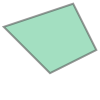

In [7]:
polygon = Polygon(list_of_points)
polygon

POINT (0.0897435897435897 0.7692307692307693)
1.625


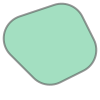

In [8]:
print(polygon.centroid)
print(polygon.area)
polygon.buffer(1)

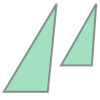

In [9]:
from shapely import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint(
    [Point(1, 2), Point(3, 4)]
)
multiline = MultiLineString(
    [LineString([(1, 7), (6, 4)]), LineString([(0, -1), (-4, 5)])]
)
multipoly = MultiPolygon(
    [Polygon([(0, 0), (-10, 0), (2, 20)]), Polygon([(3, 6), (10, 6), (11, 20)])]
)
multipoly

# GeoPandas

In [10]:
from pathlib import Path
import geopandas as gpd

In [11]:
file_path = Path("../data/kunnat.gpkg")

municipalities = gpd.read_file(file_path)

In [12]:
municipalities.head()

,kunta,vuosi,nimi,namn,name,geometry
0,005,2024,Alajärvi,Alajärvi,Alajärvi,"POLYGON ((366787.924 7001300.583, 364487.590 6..."
1,009,2024,Alavieska,Alavieska,Alavieska,"POLYGON ((382543.364 7120022.976, 382899.505 7..."
2,010,2024,Alavus,Alavo,Alavus,"POLYGON ((343298.204 6961570.195, 343831.847 6..."
3,016,2024,Asikkala,Asikkala,Asikkala,"POLYGON ((436139.680 6798279.085, 435714.468 6..."
4,018,2024,Askola,Askola,Askola,"POLYGON ((426631.036 6720528.076, 428821.749 6..."


In [13]:
type(municipalities)

geopandas.geodataframe.GeoDataFrame

In [14]:
type(municipalities.geometry)

geopandas.geoseries.GeoSeries

In [15]:
type(municipalities["geometry"])

geopandas.geoseries.GeoSeries

<Axes: >

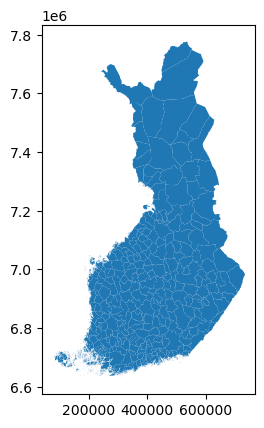

In [16]:
municipalities.plot()

<Axes: >

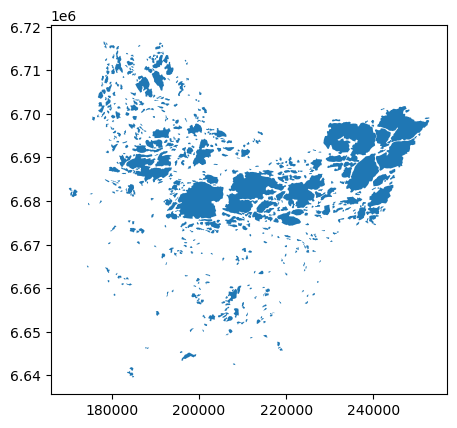

In [17]:
parainen = municipalities.loc[municipalities["nimi"] == "Parainen"]
parainen.plot()

In [18]:
municipalities.area

0      1.054710e+09
1      2.542652e+08
2      1.136098e+09
3      7.557135e+08
4      2.184572e+08
           ...     
304    2.215589e+09
305    5.788517e+08
306    1.327752e+09
307    1.842251e+08
308    9.067169e+08
Length: 309, dtype: float64

In [19]:
parainen.area

159    8.079406e+08
dtype: float64

In [20]:
municipalities.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland - onshore and offshore.
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
municipalities_wgs = municipalities.to_crs(epsg=4326)
municipalities_wgs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

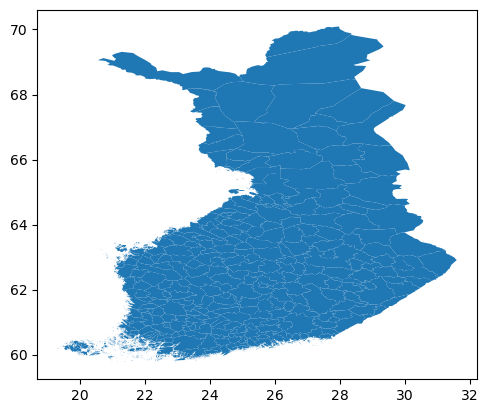

In [29]:
municipalities_wgs.plot(aspect="equal")

# Taulukosta kartalle

In [23]:
import pandas as pd

lightnings = pd.read_csv("../data/lightnings.csv")
lightnings.head()

,time,abs_peak_current_ka,latitude,longitude
0,1717200010,4.0,68.9186,22.1900
1,1717200010,5.0,68.8757,22.2367
2,1717200010,2.0,68.7596,22.2646
3,1717200011,1.0,68.7883,21.7543
4,1717200044,7.0,68.7939,21.3669


In [24]:
geo_lightnings = gpd.GeoDataFrame(lightnings)
geo_lightnings.head()

,time,abs_peak_current_ka,latitude,longitude
0,1717200010,4.0,68.9186,22.1900
1,1717200010,5.0,68.8757,22.2367
2,1717200010,2.0,68.7596,22.2646
3,1717200011,1.0,68.7883,21.7543
4,1717200044,7.0,68.7939,21.3669


In [25]:
geo_lightnings = geo_lightnings.set_geometry(
    gpd.points_from_xy(x=lightnings["longitude"], y=lightnings["latitude"])
)

geo_lightnings.head()

,time,abs_peak_current_ka,latitude,longitude,geometry
0,1717200010,4.0,68.9186,22.1900,POINT (22.19000 68.91860)
1,1717200010,5.0,68.8757,22.2367,POINT (22.23670 68.87570)
2,1717200010,2.0,68.7596,22.2646,POINT (22.26460 68.75960)
3,1717200011,1.0,68.7883,21.7543,POINT (21.75430 68.78830)
4,1717200044,7.0,68.7939,21.3669,POINT (21.36690 68.79390)


<Axes: >

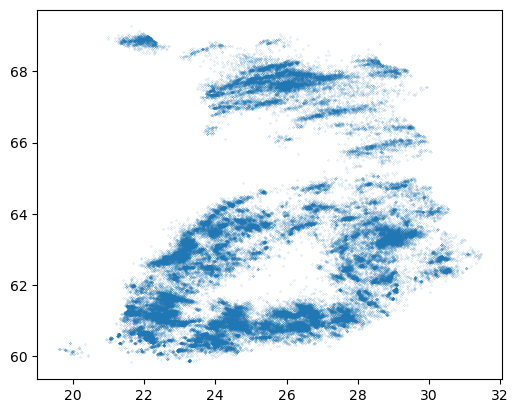

In [30]:
geo_lightnings.plot(markersize=0.01)

In [31]:
geo_lightnings.to_crs(epsg=3067)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [32]:
geo_lightnings.crs

In [33]:
geo_lightnings = geo_lightnings.set_crs(epsg=4326)
geo_lightnings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
geo_lightnings = geo_lightnings.to_crs(epsg=3067)
geo_lightnings.head()

,time,abs_peak_current_ka,latitude,longitude,geometry
0,1717200010,4.0,68.9186,22.1900,POINT (307084.785 7652846.986)
1,1717200010,5.0,68.8757,22.2367,POINT (308583.656 7647929.663)
2,1717200010,2.0,68.7596,22.2646,POINT (308705.557 7634930.220)
3,1717200011,1.0,68.7883,21.7543,POINT (288404.648 7639794.935)
4,1717200044,7.0,68.7939,21.3669,POINT (272871.312 7641801.097)


# Harjoitus - salamahavainnot kunnittain